In [4]:
import numpy as np
from sklearn.linear_model import LinearRegression
import torch
from torch import nn,optim
from torchviz import make_dot
from matplotlib import pyplot as plt

%matplotlib inline
plt.rcParams['font.sans-serif'] = ['Heiti TC']  # 使用苹方字体
plt.rcParams['axes.unicode_minus'] = False    # 解决负号显示问题

# 一、基于Numpy实现线性回归

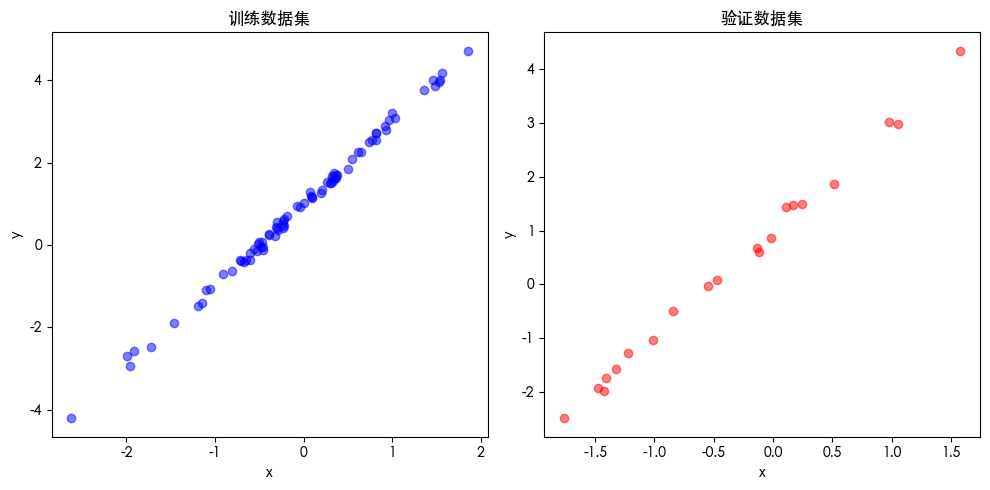

In [5]:
# 1.数据准备
true_b = 1
true_w = 2
N = 100 # 生成的数据个数

np.random.seed(42) # 指定随机数种子
x = np.random.randn(N,1)
# print(x)
noise = (0.1 * np.random.randn(N,1)) # 噪音数据
y = true_b + true_w *x + noise

idx = np.arange(N)
np.random.shuffle(idx) # 打乱顺序 模拟shuffle

# 使用前80个索引进行训练
train_idx = idx[:int(N*0.8)]
# 使用剩余的索引进行验证
val_idx = idx[int(N*0.8):]

# 生成训练集和验证集
x_train,y_train = x[train_idx],y[train_idx]
x_val,y_val = x[val_idx],y[val_idx]

# 数据展示
fig,axs = plt.subplots(1,2,figsize=(10,5))
axs[0].scatter(x_train,y_train,c='b',alpha=0.5)
axs[0].set_xlabel('x')
axs[0].set_ylabel('y')
axs[0].set_title('训练数据集')
axs[1].scatter(x_val,y_val,c='r',alpha=0.5)
axs[1].set_xlabel('x')
axs[1].set_ylabel('y')
axs[1].set_title('验证数据集')
plt.tight_layout()  # 自动调整子图间距
plt.show()

In [8]:
b = np.random.randn(1)
w = np.random.randn(1)
print(f"随机初始化的b:{b} w:{w}")

# 设置学习率
lr = 0.1
# 定义周期数
epochs = 100

for epoch in range(epochs):
    # 第一步：计算模型的预测输出---前向传播
    yhat = b + w * x_train
    # 第二步：计算误差
    # 使用所有的数据，所以是批量梯度下降
    # 模型有多大的错误，那就是误差
    error = (yhat - y_train)
    # 这是回归，所以计算均方误差（MSE）
    loss = (error ** 2).mean()
    
    # 第三步：计算参数b和w的梯度
    b_grand = 2 * error.mean()
    w_grand = 2 * (x_train * error).mean()
    
    # 第四步：使用梯度和学习率
    # 更新参数
    b = b - lr * b_grand
    w = w - lr * w_grand
    
    if epoch % 10 == 0:
        print(f"b: {b[0]} w: {w[0]}")

随机初始化的b:[-1.29494247] w:[-0.1051185]
b: -0.8539021633286136 w: 0.20510092720149686
b: 0.7710918141429026 w: 1.6368027645759757
b: 0.9666308889108446 w: 1.918920375447136
b: 0.9917030667366894 w: 1.9727610119144474
b: 0.9951659564561766 w: 1.9828642379256223
b: 0.9956816934573788 w: 1.984742672837849
b: 0.9957637521326971 w: 1.9850901204973237
b: 0.9957774905656466 w: 1.9851541994192365
b: 0.9957798736601666 w: 1.9851659977407452
b: 0.9957802966291114 w: 1.9851681680113316


# 二、PyTorch

In [9]:
import torch

In [12]:
scalar = torch.tensor(3.141592653589793)
vector = torch.tensor([1,2,3])
matrix = torch.ones(2,3,dtype=torch.float)
tensor = torch.randn((2,3,4),dtype=torch.float)

print(f"【scalar】 shape:{scalar.shape} ndim:{scalar.ndim}")
print(f"【vector】 shape:{vector.shape} ndim:{vector.ndim}")
print(f"【matrix】 shape:{matrix.shape} ndim:{matrix.ndim}")
print(f"【tensor】 shape:{tensor.shape} ndim:{tensor.ndim}")

【scalar】 shape:torch.Size([]) ndim:0
【vector】 shape:torch.Size([3]) ndim:1
【matrix】 shape:torch.Size([2, 3]) ndim:2
【tensor】 shape:torch.Size([2, 3, 4]) ndim:3


In [13]:
# 选择设备
device = torch.device("cuda:0" if torch.cuda.is_available() else "mps" if torch.backends.mps.is_available() else "cpu")

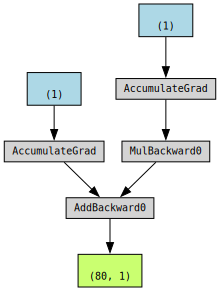

In [16]:
from torchviz import make_dot
x_train = torch.as_tensor(x_train, dtype=torch.float).to(device)
y_train = torch.as_tensor(y_train, dtype=torch.float).to(device)

b = torch.randn(1,requires_grad=True,device=device,dtype=torch.float)
w = torch.randn(1,requires_grad=True,device=device,dtype=torch.float)
# 前向传播
yhat = b + w * x_train
# 计算损失
error = (yhat - y_train)
loss = (error ** 2).mean()

# 绘制 动态计算图
make_dot(yhat)

In [17]:
# 定义模型
class LinearModel(nn.Module):
    def __init__(self):
        super(LinearModel, self).__init__()
        # 为了使b和w成为模型的实际参数
        # 需要使用nn.Parameter 对他们进行包装
        self.b = nn.Parameter(torch.randn(1,requires_grad=True,dtype=torch.float))
        self.w = nn.Parameter(torch.randn(1,requires_grad=True,dtype=torch.float))
    
    def forward(self,x):
        return self.w * x + self.b

In [21]:
model = LinearModel()
print("参数：",list(model.parameters()))
print("state_dict: ",model.state_dict())

参数： [Parameter containing:
tensor([0.0661], requires_grad=True), Parameter containing:
tensor([-1.5387], requires_grad=True)]
state_dict:  OrderedDict({'b': tensor([0.0661]), 'w': tensor([-1.5387])})


In [24]:
optimizer = optim.SGD(model.parameters(),lr=0.01)
print(f"optimizer:{optimizer}")

optimizer:SGD (
Parameter Group 0
    dampening: 0
    differentiable: False
    foreach: None
    fused: None
    lr: 0.01
    maximize: False
    momentum: 0
    nesterov: False
    weight_decay: 0
)


In [31]:
model = nn.Sequential(nn.Linear(3,5),nn.Linear(5,1))
model.state_dict()

OrderedDict([('0.weight',
              tensor([[-0.3037, -0.1109, -0.4174],
                      [ 0.3091, -0.4037,  0.4456],
                      [ 0.1441, -0.1443,  0.3814],
                      [ 0.3369,  0.4025, -0.1278],
                      [-0.5117, -0.4553,  0.3370]])),
             ('0.bias', tensor([ 0.5352,  0.3135, -0.3333,  0.5527, -0.1221])),
             ('1.weight',
              tensor([[-0.0070,  0.3545,  0.0215, -0.1178, -0.0017]])),
             ('1.bias', tensor([-0.1489]))])

Available line magics:
%alias  %alias_magic  %autoawait  %autocall  %automagic  %autosave  %bookmark  %cat  %cd  %clear  %code_wrap  %colors  %conda  %config  %connect_info  %cp  %debug  %dhist  %dirs  %doctest_mode  %ed  %edit  %env  %gui  %hist  %history  %killbgscripts  %ldir  %less  %lf  %lk  %ll  %load  %load_ext  %loadpy  %logoff  %logon  %logstart  %logstate  %logstop  %ls  %lsmagic  %lx  %macro  %magic  %mamba  %man  %matplotlib  %micromamba  %mkdir  %more  %mv  %notebook  %page  %pastebin  %pdb  %pdef  %pdoc  %pfile  %pinfo  %pinfo2  %pip  %popd  %pprint  %precision  %prun  %psearch  %psource  %pushd  %pwd  %pycat  %pylab  %qtconsole  %quickref  %recall  %rehashx  %reload_ext  %rep  %rerun  %reset  %reset_selective  %rm  %rmdir  %run  %save  %sc  %set_env  %store  %sx  %system  %tb  %time  %timeit  %unalias  %unload_ext  %who  %who_ls  %whos  %xdel  %xmode

Available cell magics:
%%!  %%HTML  %%SVG  %%bash  %%capture  %%code_wrap  %%debug  %%file  %%html  %%javascript  %%js  %